<a href="https://colab.research.google.com/github/leonardo3108/robustez-query/blob/main/code/Figure%20nDGC10%20Originals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
 !wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/ndcg10_originals.csv

--2021-11-09 00:36:22--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/ndcg10_originals.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4418 (4.3K) [text/plain]
Saving to: ‘ndcg10_originals.csv’

ndcg10_originals.cs 100%[===================>]   4.31K  --.-KB/s    in 0s      

2021-11-09 00:36:22 (53.2 MB/s) - ‘ndcg10_originals.csv’ saved [4418/4418]



In [10]:
import pandas as pd
import csv

df_nDCG = pd.read_csv('ndcg10_originals.csv')
df_nDCG

,Query#,BM25_nDCG@10,Rerank_nDCG@10,Text
0,23849,0.009089,0.524757,are naturalization records public information
1,42255,0.794655,0.909684,average salary for dental hygienist in nebraska
2,47210,0.636973,0.949967,average wedding dress alteration cost
3,67316,0.260714,0.646910,can fever cause miscarriage early pregnancy
4,118440,0.138862,0.278481,define bmt medical
5,121171,0.370976,0.451428,define etruscans
6,135802,0.977854,0.754671,definition of laudable
7,141630,0.321125,0.618486,describe how muscles and bones work together t...
8,156498,0.309856,0.720378,do google docs auto save
9,169208,0.270242,0.411146,does mississippi have an income tax


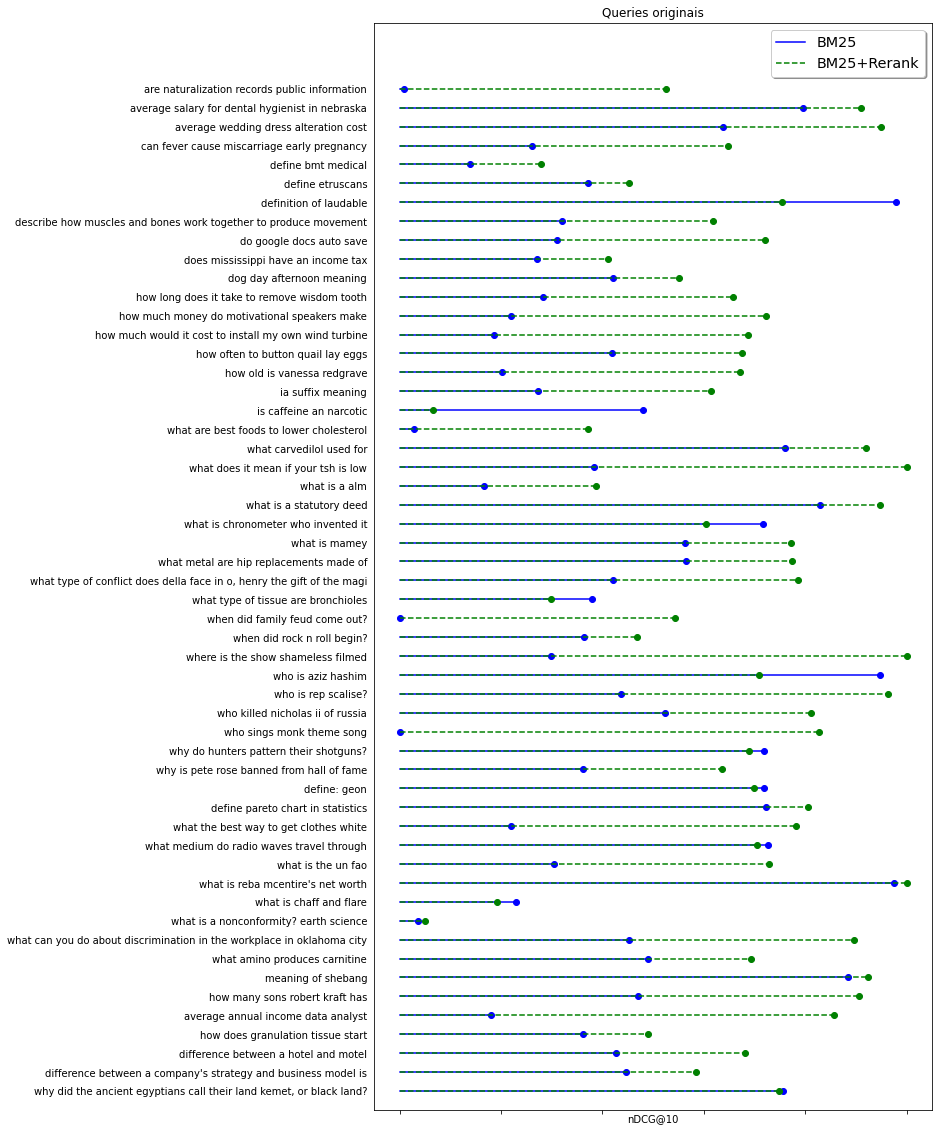

In [127]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 20))
ax = fig.subplots()
data = df_nDCG.to_dict(orient='index')

Y = np.zeros(10)
yticklabels = []

first = True
for i, query in enumerate(sorted(data.keys(), reverse=True)):
    nDCG = 100 * data[query]['BM25_nDCG@10']
    if first:
        ax.plot(np.linspace(0, nDCG, 10), Y+i, linestyle='solid', linewidth=1.5, color='blue', label='BM25')
    else:
        ax.plot(np.linspace(0, nDCG, 10), Y+i, linestyle='solid', linewidth=1.5, color='blue')
    ax.plot(nDCG, i, 'bo')
    nDCG = 100 * data[query]['Rerank_nDCG@10']
    if first:
        ax.plot(np.linspace(0, nDCG, 10), Y+i, linestyle='dashed', linewidth=1.5, color='green', label='BM25+Rerank')
    else:
        ax.plot(np.linspace(0, nDCG, 10), Y+i, linestyle='dashed', linewidth=1.5, color='green')
    ax.plot(nDCG, i, 'go')
    yticklabels.append(data[query]['Text'])
    first = False

#dotted, dashdot

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_title('Queries originais')
ax.set(ylim=(-1, len(data)+2.5),
        yticks=np.arange(len(data)), 
        xticks=np.arange(0, 110, 20),
        yticklabels=yticklabels)
ax.set_xlabel('nDCG@10')
ax.tick_params(left=False, bottom=True, labelbottom=False)
fig.savefig('ndcg10_originals.png', transparent=False, dpi=80, bbox_inches='tight')

In [133]:
df_nDCG[['BM25_nDCG@10', 'Rerank_nDCG@10']].describe()

,BM25_nDCG@10,Rerank_nDCG@10
count,54.000000,54.000000
mean,0.433924,0.669499
std,0.260458,0.226781
min,0.000000,0.050171
25%,0.263096,0.559207
50%,0.400750,0.695759
75%,0.618874,0.809561
max,0.977854,1.000000
